In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from prophet import Prophet

In [13]:
def getCategory(cat):
    df = pd.read_csv('bilan-electrique-transpose.csv', sep=";", parse_dates = ['jour'])
    df = df[df["categorie"] == str(cat)].sort_values(by="jour")
    df = df.drop(columns=["categorie"])
    df = df.rename(columns={"jour": "ds", "value": "y"})
    df["y"] = np.log(df["y"])
    df.plot(x="ds", y="y")
    return df

In [28]:
def predict(df):
    # Model fit
    m = Prophet()
    m.fit(df) # Fit the Prophet model.
    # Predict
    # Make future date data frame for the next 365 days (it gives daily because it follows          the frequency in input dataframe by default).
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future) # Predict future value.
    # Plot results
    fig1 = m.plot(forecast) # Plot the fit to past data and future forcast.
    fig2 = m.plot_components(forecast) # Plot breakdown of components.
    plt.show()
    print(forecast)
    return m

In [15]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

def validate_model(m):
    # Execute cross validation
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
    pm = performance_metrics(df_cv, rolling_window=0.1)
    display(pm.head(),pm.tail())
    fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
    plt.show()

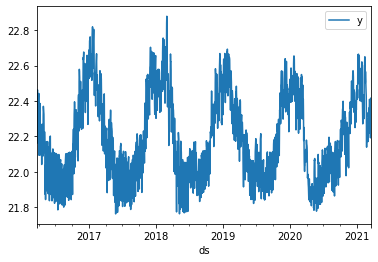

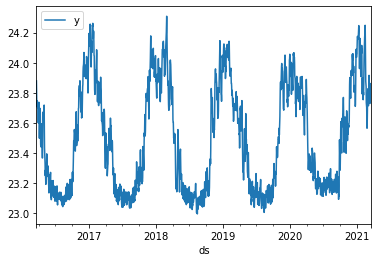

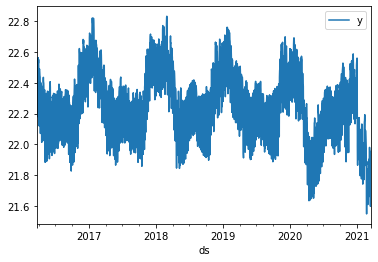

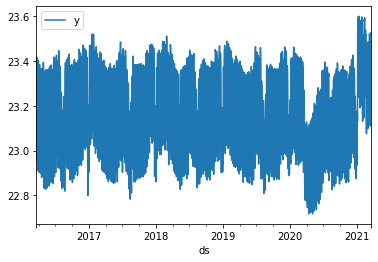

In [20]:
df1 = getCategory("Professionnels")
df2 = getCategory("Résidentiels")
df3 = getCategory("PME / PMI")
df4 = getCategory("Entreprises")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


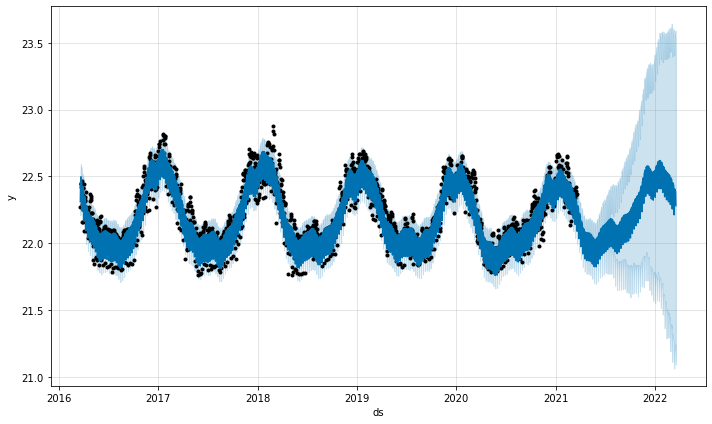

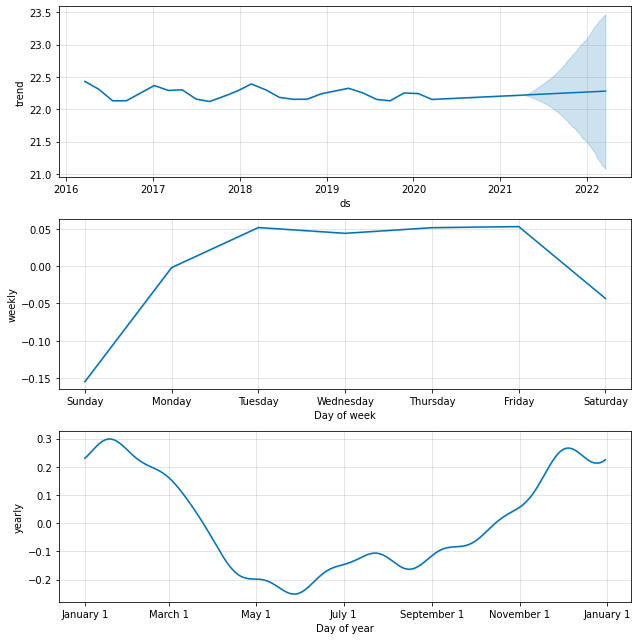

             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2016-03-20  22.430160   22.210810   22.407813    22.430160    22.430160   
1    2016-03-21  22.428093   22.363560   22.549374    22.428093    22.428093   
2    2016-03-22  22.426025   22.405824   22.592978    22.426025    22.426025   
3    2016-03-23  22.423958   22.383509   22.576317    22.423958    22.423958   
4    2016-03-24  22.421890   22.384588   22.574093    22.421890    22.421890   
...         ...        ...         ...         ...          ...          ...   
2186 2022-03-15  22.278183   21.217000   23.561964    21.101498    23.453280   
2187 2022-03-16  22.278359   21.189135   23.569488    21.096125    23.457278   
2188 2022-03-17  22.278534   21.240171   23.575086    21.088053    23.461276   
2189 2022-03-18  22.278709   21.173082   23.590113    21.079632    23.465274   
2190 2022-03-19  22.278884   21.093954   23.486863    21.071261    23.469271   

      additive_terms  additive_terms_lo

In [21]:
predict(df1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


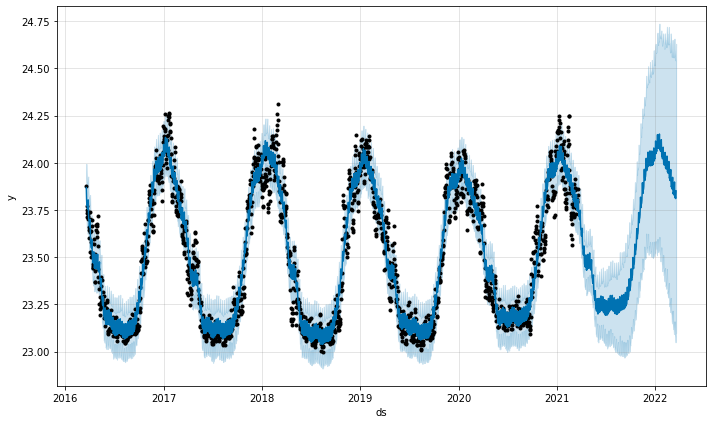

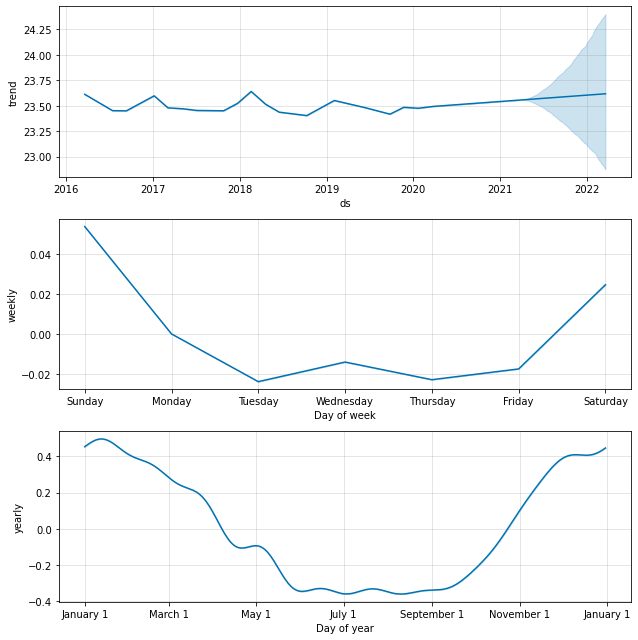

             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2016-03-20  23.612401   23.757394   23.994235    23.612401    23.612401   
1    2016-03-21  23.611029   23.689442   23.932093    23.611029    23.611029   
2    2016-03-22  23.609658   23.650282   23.897747    23.609658    23.609658   
3    2016-03-23  23.608286   23.659144   23.903565    23.608286    23.608286   
4    2016-03-24  23.606914   23.645507   23.880379    23.606914    23.606914   
...         ...        ...         ...         ...          ...          ...   
2186 2022-03-15  23.616785   23.087264   24.564621    22.889967    24.386682   
2187 2022-03-16  23.616956   23.081341   24.588986    22.885317    24.389840   
2188 2022-03-17  23.617127   23.049099   24.542294    22.880941    24.392998   
2189 2022-03-18  23.617299   23.095851   24.564642    22.878614    24.396157   
2190 2022-03-19  23.617470   23.097148   24.630211    22.876593    24.399315   

      additive_terms  additive_terms_lo

In [22]:
predict(df2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


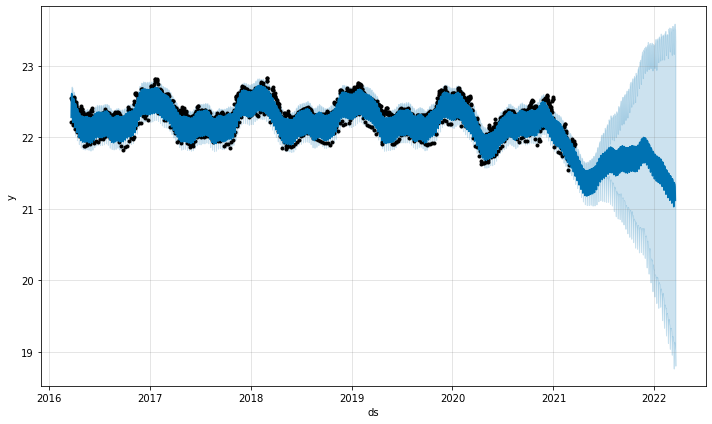

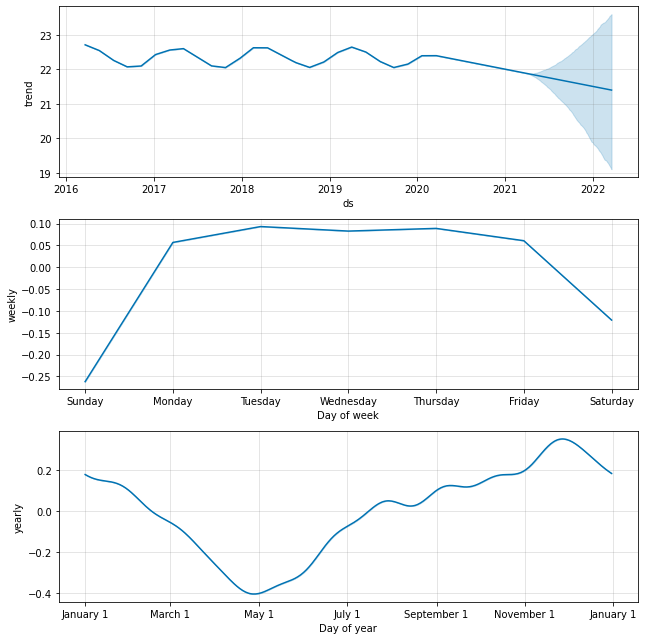

             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2016-03-20  22.716179   22.177866   22.382222    22.716179    22.716179   
1    2016-03-21  22.713383   22.491919   22.693512    22.713383    22.713383   
2    2016-03-22  22.710587   22.519765   22.710660    22.710587    22.710587   
3    2016-03-23  22.707790   22.489522   22.685704    22.707790    22.707790   
4    2016-03-24  22.704994   22.490228   22.695374    22.704994    22.704994   
...         ...        ...         ...         ...          ...          ...   
2186 2022-03-15  21.407990   19.133626   23.542175    19.157001    23.575337   
2187 2022-03-16  21.406621   19.084450   23.591367    19.140361    23.583754   
2188 2022-03-17  21.405251   19.041762   23.521602    19.123809    23.591478   
2189 2022-03-18  21.403881   19.029750   23.510235    19.113872    23.599095   
2190 2022-03-19  21.402512   18.805363   23.345210    19.106076    23.605395   

      additive_terms  additive_terms_lo

In [45]:
predict(df3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


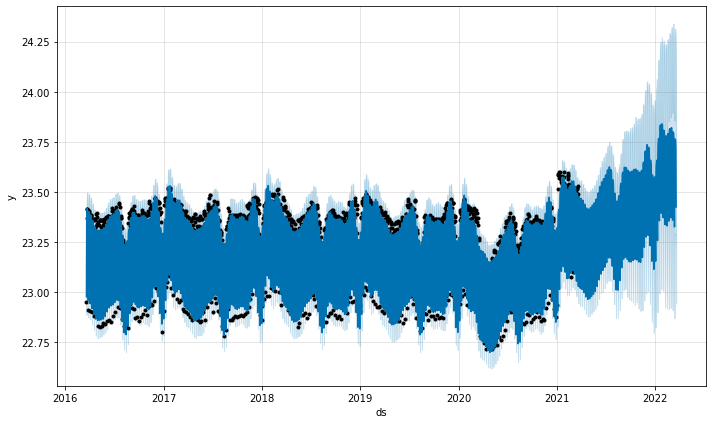

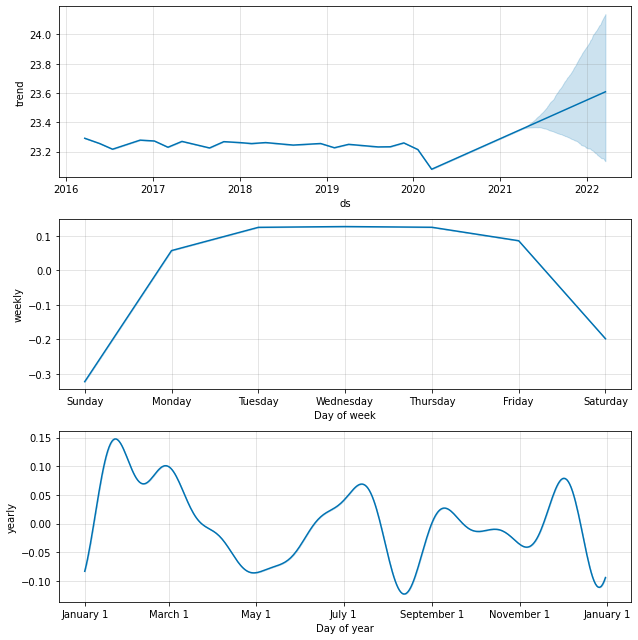

INFO:prophet:Making 5 forecasts with cutoffs between 2018-03-30 00:00:00 and 2020-03-19 00:00:00
  0%|          | 0/5 [00:00<?, ?it/s]             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2016-03-20  23.290981   22.886707   23.060278    23.290981    23.290981   
1    2016-03-21  23.290419   23.272639   23.435845    23.290419    23.290419   
2    2016-03-22  23.289857   23.331667   23.497820    23.289857    23.289857   
3    2016-03-23  23.289295   23.332319   23.493911    23.289295    23.289295   
4    2016-03-24  23.288733   23.330693   23.496161    23.288733    23.288733   
...         ...        ...         ...         ...          ...          ...   
2186 2022-03-15  23.605639   23.291349   24.294411    23.141739    24.127278   
2187 2022-03-16  23.606363   23.285430   24.314114    23.139460    24.129864   
2188 2022-03-17  23.607087   23.279918   24.294129    23.136896    24.132259   
2189 2022-03-18  23.607811   23.227681   24.239438    23.134441   

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.012561,0.112074,0.073382,0.003179,0.001411,0.003168,0.646154
1,38 days,0.012647,0.112459,0.073719,0.003193,0.001411,0.003182,0.646154
2,39 days,0.013055,0.114259,0.074854,0.003242,0.001506,0.003231,0.643956
3,40 days,0.013123,0.114555,0.075580,0.003273,0.001533,0.003262,0.643956
4,41 days,0.014196,0.119148,0.078472,0.003399,0.002098,0.003386,0.635165


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
324,361 days,0.031408,0.177224,0.140682,0.006041,0.004700,0.006034,0.827473
325,362 days,0.031429,0.177283,0.140909,0.006051,0.004761,0.006044,0.827473
326,363 days,0.031373,0.177124,0.140947,0.006052,0.004802,0.006045,0.827473
327,364 days,0.031602,0.177769,0.141927,0.006095,0.004990,0.006087,0.827473
328,365 days,0.031951,0.178749,0.142984,0.006142,0.005079,0.006134,0.827473


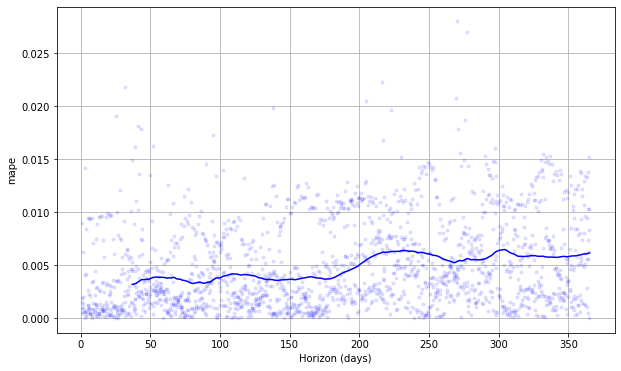

In [25]:
m4 = predict(df4)
validate_model(m4)